Below is an overview of Markov’s and Hoeffding’s inequalities, their relevance for bounding generalization error in Machine Learning, and a simple Python example illustrating how they provide probabilistic bounds on the deviation of sample averages from the true (expected) mean.

──────────────────────────────────────────────────────────────────────
1. Markov’s Inequality
──────────────────────────────────────────────────────────────────────

• Statement.

  Let X ≥ 0 be a non-negative random variable, and let a > 0. Markov’s inequality states:  
        P(X ≥ a) ≤ E[X] / a.

• Interpretation.

  Markov’s inequality provides an upper bound on the tail probability of non-negative random variables. Although it is a simple and somewhat loose bound in many cases, it is still valuable where we lack additional assumptions (e.g., boundedness or sub-Gaussian behavior).

• Example usage in ML.

  In some generalization-bounds derivations, one uses Markov’s inequality to show that “with high probability” (≥ 1 − δ), a certain random variable (e.g., the deviation between training and true risk) is not too large. However, this is often only an initial step or used when the random variable is positive but might not have bounded support; more refined bounds (like Hoeffding’s) might give sharper results.


──────────────────────────────────────────────────────────────────────
2. Hoeffding’s Inequality
──────────────────────────────────────────────────────────────────────

• Statement (basic form for bounded i.i.d. random variables).

  Suppose X₁, X₂, …, Xₙ are i.i.d. random variables with Xᵢ ∈ [a, b] almost surely for each i. Let  
        Sₙ = (X₁ + X₂ + … + Xₙ)/n    (the sample mean).
  Then for any t > 0,
        P(|Sₙ − E[X₁]| ≥ t) ≤ 2 exp( − 2n t² / (b − a)² ).

• Interpretation.

  Hoeffding’s inequality is a concentration inequality that provides an exponential tail bound on the probability that the sample mean deviates from its expected value by a given amount t. It relies on the fact that Xᵢ is bounded.

• Example usage in ML for generalization bounds.

  In the setting of Empirical Risk Minimization (ERM), one has a hypothesis class H and a training set of size n, producing an empirical risk R̂(h). The true risk R(h) is the expectation of the loss over the underlying data distribution. If losses are bounded (say in [0, 1]), then Hoeffding’s inequality can be used to state (in simple terms) that, with high probability:
        |R̂(h) − R(h)| ≤ √( (1 / (2n)) ln(2/δ) ).
  This is one of the simplest forms of generalization bounds (sometimes also referred to as the Chernoff / Hoeffding bound), showing that the gap between empirical and true risk shrinks on the order of O(√(ln(1/δ)/n)) with probability 1 − δ.


──────────────────────────────────────────────────────────────────────
3. Simple Python Example
──────────────────────────────────────────────────────────────────────

Below is a small snippet to illustrate how Markov’s inequality and Hoeffding’s inequality can be used to bound the probability that an empirical average deviates from its true mean.

We will:
1. Generate i.i.d. random variables Xᵢ from a known distribution (e.g., Uniform(0,1)).
2. Compute the sample mean.
3. Compare:
   • The empirical frequency of the event { |Sₙ − E[X₁]| ≥ t } over many trials.
   • The Markov and Hoeffding bounds on P(|Sₙ − E[X₁]| ≥ t).

──────────────────────────────────────────────────────────────────────
Code
──────────────────────────────────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt

def markov_bound(mean, alpha):
    """
    Markov's inequality for non-negative random variables.
    We apply it to |X - mean|, but typically Markov's inequality is for X >= 0.
    For demonstration, let's assume X >= 0 and we want P(X >= alpha).
    If E[X] = mean_X, then P(X >= alpha) ≤ mean_X / alpha.
    """
    # If we consider deviation X >= alpha (where X is the random variable),
    # then Markov bound says: P(X >= alpha) <= E[X] / alpha = mean / alpha.
    return mean / alpha

def hoeffding_bound(n, t, a, b):
    """
    Hoeffding's inequality bound for the probability that the sample
    mean deviates from its expectation by at least t, given variables
    in [a, b].
    """
    return 2 * np.exp(-2 * n * (t**2) / (b - a)**2)

# Parameters
n = 1000               # number of samples per experiment
num_experiments = 5000 # how many times to repeat
a, b = 0, 1            # Xᵢ ∈ [0, 1]
true_mean = 0.5        # E[Xᵢ] for Uniform(0, 1)
t = 0.1                # deviation threshold

# Generate many experiments
deviations = 0
for _ in range(num_experiments):
    # Sample n points from Uniform(0,1)
    samples = np.random.rand(n)
    sample_mean = np.mean(samples)
    
    # Check if deviation >= t
    if abs(sample_mean - true_mean) >= t:
        deviations += 1

# Empirical probability of a large deviation
empirical_prob = deviations / num_experiments

# Theoretical Markov bound
# For demonstration with Markov’s inequality, we need a non-negative r.v.
# Often we apply Markov to X = |Sₙ − E[Sₙ]| or something similar.
# The expected absolute deviation from the mean for Uniform(0,1) is 1/4.
expected_abs_dev = 1/4  # E[|X - 0.5|] for X ~ Uniform(0,1) is 1/4.

markov_p = markov_bound(expected_abs_dev, t)

# Hoeffding bound
hoeffding_p = hoeffding_bound(n, t, a, b)

print(f"Empirical probability of deviation ≥ {t}  : {empirical_prob:.5f}")
print(f"Markov bound estimate                     : {markov_p:.5f}")
print(f"Hoeffding bound estimate                  : {hoeffding_p:.5f}")

# Plot the bounds vs. the empirical probability
labels = ["Empirical", "Markov", "Hoeffding"]
values = [empirical_prob, markov_p, hoeffding_p]
plt.bar(labels, values, color=["blue", "red", "green"])
plt.ylabel("Probability / Bound")
plt.title(f"Probability of |Sample Mean - 0.5| ≥ {t}")
plt.ylim([0, max(values)*1.2])
plt.show()

──────────────────────────────────────────────────────────────────────
Explanation of the Code
──────────────────────────────────────────────────────────────────────
1. We choose n = 1000 samples from Uniform(0,1). The true mean is 0.5.  
2. We run num_experiments = 5000 independent trials. In each trial, we measure the sample mean. We check how often the absolute difference from 0.5 is at least t = 0.1.  
3. Empirical probability: deviations / num_experiments. This is the fraction of trials where the sample mean deviates by at least 0.1.  
4. Markov Bound:
   • Strictly, Markov’s inequality is stated for non-negative random variables (e.g., X ≥ 0). One might attempt to apply Markov to the random variable |Sₙ − 0.5|.  
   • E[|X − 0.5|] for X ∼ Uniform(0,1) is 1/4. So, Markov says:  
         P(|X − 0.5| ≥ t) ≤ (1/4) / t.  
     This is often quite loose, especially when t is not very small.  
5. Hoeffding Bound:
   • For a single Xᵢ in [0,1], the width (b − a) = 1.  
   • Hoeffding’s inequality says:  
         P(|Sₙ − E[Sₙ]| ≥ t) ≤ 2 exp(−2 n t²).  

──────────────────────────────────────────────────────────────────────
Application to Generalization Bounds in ML
──────────────────────────────────────────────────────────────────────

• In supervised learning, one often defines a loss function L(h(x), y) ∈ [0,1]. Then the true risk of a hypothesis h is R(h) = E[L(h(X), Y)], and the empirical risk on a training set of n i.i.d. samples is R̂(h).  
• Applying Hoeffding’s (or related) concentration inequalities to the sums of bounded random variables (0 ≤ L ≤ 1) yields a bound on |R(h) − R̂(h)|. For a fixed h, Hoeffding’s inequality implies:  
      P( |R̂(h) − R(h)| ≥ t ) ≤ 2 exp(−2 n t²).  
• By union bounds and other techniques, we can extend this to entire hypothesis classes (VC bounds, Rademacher complexity bounds, etc.). These results say that, with high probability over the choice of the training set, no hypothesis in the class will have too large a gap between empirical and true risk.  

Thus, Markov’s inequality, while simpler, often gives initial or looser bounds under minimal assumptions; Hoeffding’s inequality, thanks to its exponential decay, is more powerful if we can assume the data or losses lie in a bounded range. This phenomenon is central to guaranteeing generalization in many machine learning methods.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Below is a more in-depth discussion of Markov’s inequality, including its intuition, why it requires 
non-negativity of the random variable and threshold, typical use cases, and an example where it is tight.

────────────────────────────────────────────────────────────────────────
1. Statement of Markov’s Inequality
────────────────────────────────────────────────────────────────────────

Let X ≥ 0 be a non-negative random variable and let a > 0. Then Markov’s inequality states:  
  P(X ≥ a) ≤ E[X] / a.

In words: the probability that X is at least a is bounded above by the ratio of its expectation to a.

────────────────────────────────────────────────────────────────────────
2. Intuition
────────────────────────────────────────────────────────────────────────

• “Average cost” argument.  
  One intuitive way to see this is to think: if on average X equals E[X], how large can the event X ≥ a be? 
  If X is often bigger than a, then the average value of X would have to be at least a times that (large) probability. Concretely,  
     E[X] = ∫ X dP ≥ ∫{X ≥ a} X dP ≥ a × P(X ≥ a).  
  Hence,  
     P(X ≥ a) ≤ E[X] / a.  

• Interpretation: “Loose but universal.”  
  Markov’s inequality requires no assumptions beyond X ≥ 0 and a > 0. 
  This generality often makes the bound loose compared to more specialized 
  inequalities (e.g., Hoeffding’s, Chebyshev’s, Chernoff bounds), but Markov’s inequality can be applied extremely broadly.

────────────────────────────────────────────────────────────────────────
3. Why must X be non-negative?
────────────────────────────────────────────────────────────────────────

• Essential for the derivation.  
  The key step in the derivation is that  
     E[X] = ∫ X dP ≥ ∫{X ≥ a} X dP ≥ a ∫{X ≥ a} dP = a P(X ≥ a),  
  which only holds if X ≥ 0 (so that X ≥ a implies X ≥ a > 0).  
  If X could take negative values, then you cannot argue that X ≥ a implies X ≥ a > 0, 
  and you lose that simple lower bound on the expectation.

• Avoiding sign ambiguity.  
  If X could be negative, the statement P(X ≥ a) ≤ E[X]/a might not even make sense when a > 0, 
  because part of the mass of X might be negative, and the integral argument breaks down.  

────────────────────────────────────────────────────────────────────────
4. Why must a be positive?
────────────────────────────────────────────────────────────────────────

• Dividing by a.  
  Markov’s inequality in the form E[X]/a necessitates that a > 0 so the ratio is well-defined.

• Tail probability interpretation.  
  Typically, we are interested in bounding the probability that X exceeds some positive threshold a. 
  If a ≤ 0, then P(X ≥ a) might be trivial (e.g., P(X ≥ 0) could be 1 if X ≥ 0), 
  which does not give us a meaningful tail bound.

────────────────────────────────────────────────────────────────────────
5. Typical Use Cases
────────────────────────────────────────────────────────────────────────

• Bounding large deviations when only the mean is known.  
  Markov’s inequality applies if you only know E[X] and the non-negativity of X. For instance, 
  if X is a positively valued loss or cost, you can say, 
  “the chance that the cost is at least a is no more than mean_cost / a.”

• Building block for other bounds.  
  Markov’s inequality is frequently used as a stepping stone in deriving more refined concentration
  inequalities. For example, one can apply Markov’s inequality to the random variable exp(λX)
  to get the Chernoff bound on X.

• Initial feasibility checks.  
  In some scenarios where you simply need a very rough, guaranteed bound 
  (and you do not have information about variance or other moments), Markov’s is the go-to inequality.

────────────────────────────────────────────────────────────────────────
6. Example of a Random Variable Where Markov’s Inequality is Tight
────────────────────────────────────────────────────────────────────────

Markov’s inequality becomes exact (i.e., “tight”) for a random variable that takes the 
value 0 with some probability and a ≥ 0 with the complementary probability.  

For instance:  
• Let X =  
    0,        with probability p₀,  
    c ≥ 0,    with probability p₁ = 1 − p₀,  

such that E[X] = c × p₁.  

If we choose a = c, then  
  P(X ≥ c) = P(X = c) = p₁.  
On the other hand, Markov’s inequality says:  
  P(X ≥ c) ≤ E[X]/c = (c × p₁) / c = p₁.  

So, in this case P(X ≥ c) = p₁ = E[X]/c, and the inequality is an equality. 
Hence Markov’s inequality is perfectly tight for this distribution (0-or-c distribution).  

In words: if a random variable is “all or nothing” (0 or a constant value), 
Markov’s inequality can be saturated exactly.

────────────────────────────────────────────────────────────────────────
Summary
────────────────────────────────────────────────────────────────────────

• Markov’s inequality bounds the tail of a non-negative random variable by comparing its mean to a positive threshold.  
• The derivation relies on X ≥ 0 and a > 0 to avoid sign issues and to define a meaningful tail event.  
• It is often a “first step” or fallback in probability theory when no other assumptions (like boundedness or sub-Gaussian behavior) can be made.  
• Though it can be loose in many practical situations, there are specific distributions (e.g., a point mass at 0 and a) for which it is tight.


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Below is a step‐by‐step explanation of the chain of inequalities

   E[X] = ∫ X dP ≥ ∫{X ≥ a} X dP ≥ a × P(X ≥ a),

where X ≥ 0 is a nonnegative random variable, a > 0 is a positive number, 
and {X ≥ a} is the event that “X takes a value at least a.”

────────────────────────────────────────────────────────────────────────
1. E[X] = ∫ X dP
────────────────────────────────────────────────────────────────────────

• Definition of expectation (measure‐theoretic view).  
  The expectation E[X] of a nonnegative random variable X can be expressed as the Lebesgue integral of X
  with respect to a probability measure P over the entire sample space Ω:
      E[X] = ∫ X(ω) dP(ω).  
  Since it is a probability measure, P(Ω) = 1.

────────────────────────────────────────────────────────────────────────
2. Decomposing E[X] over subsets
────────────────────────────────────────────────────────────────────────

• Splitting the integral into two parts.  
  We can split the integral ∫ X dP into two integrals: 
  one over the set A = {ω : X(ω) ≥ a} and one over the complement Aᶜ = {ω : X(ω) < a}:
      ∫ X dP = ∫{X ≥ a} X dP + ∫{X < a} X dP.
  
  Symbolically,  
      E[X] = ∫ X(ω) dP(ω)  
             = ∫(over A) X(ω) dP(ω) + ∫(over Aᶜ) X(ω) dP(ω).

────────────────────────────────────────────────────────────────────────
3. Why ∫{X ≥ a} X dP ≥ a × P(X ≥ a)?
────────────────────────────────────────────────────────────────────────

• Pointwise inequality on the set {X ≥ a}.  
  On the set A = {X ≥ a}, we have X(ω) ≥ a for every ω ∈ A (by definition of that set). Thus, for ω in A,
      X(ω) ≥ a.
  
• Integral comparison.  
  Because X(ω) ≥ a for all ω in A, it follows that  
      ∫{X ≥ a} X(ω) dP(ω) ≥ ∫{X ≥ a} a dP(ω).
  The reason is straightforward: if f(ω) ≥ g(ω) pointwise on a set S, then  
      ∫ₛ f(ω) dP(ω) ≥ ∫ₛ g(ω) dP(ω).
  Here, f(ω) = X(ω) and g(ω) = a (a constant function), and S = A.

• Turning a constant into multiplication by probability.  
  The integral of a constant a over the set A = {X ≥ a} is just:
      ∫{X ≥ a} a dP(ω) = a × P(X ≥ a).
  This is because integrating a constant a on a set of measure P(A) multiplies a by the measure of that set.

• Putting it all together.  
  Hence, combining these steps gives:  
      ∫{X ≥ a} X dP ≥ a × P(X ≥ a).

────────────────────────────────────────────────────────────────────────
4. Why ∫ X dP ≥ ∫{X ≥ a} X dP leads to E[X] ≥ a × P(X ≥ a)
────────────────────────────────────────────────────────────────────────

• Nonnegativity of X means taking smaller pieces doesn’t reduce the integral.  
  We started with  
      E[X] = ∫ X dP.  
  This is an integral over the entire sample space. Observe that  
      ∫ X dP = ∫{X ≥ a} X dP + ∫{X < a} X dP ≥ ∫{X ≥ a} X dP
  simply because the second term ∫{X < a} X dP ≥ 0 (X ≥ 0).

• Putting it all together:  
      E[X] = ∫ X dP  
            ≥ ∫{X ≥ a} X dP  
            ≥ a × P(X ≥ a).
  Hence the complete chain:  
      E[X] = ∫ X dP ≥ ∫{X ≥ a} X dP ≥ a × P(X ≥ a).

────────────────────────────────────────────────────────────────────────
EXTRA NOTES
────────────────────────────────────────────────────────────────────────

• Role of nonnegativity (X ≥ 0):  
  If X were allowed to take negative values, then on the set {X ≥ a}, 
  it might not be true that X ≥ a > 0 in a straightforward sense, 
  or the integrals could cancel with negative contributions. 
  Markov’s inequality specifically needs X ≥ 0 to ensure that “X ≥ a” 
  implies “X(ω) ≥ a” is unambiguously a positive event.  

• Role of a > 0:  
  We also need a > 0 so that a × P(X ≥ a) is meaningful, and we are bounding a tail probability in a nontrivial way.  

• Why does this imply P(X ≥ a) ≤ E[X] / a?  
  The last inequality in the chain rearranges to  
      P(X ≥ a) ≤ E[X] / a,
  which is precisely Markov’s inequality.

────────────────────────────────────────────────────────────────────────
SUMMARY
────────────────────────────────────────────────────────────────────────

The short story is that if you know that on the set {X ≥ a}, your random variable is at least a, 
you can replace X by a on that set and compare the integrals. This provides a simple, 
general upper bound on P(X ≥ a) in terms of E[X]. That is the core of Markov’s inequality.
The nonnegativity of X and positivity of a are crucial for this argument to hold.


xxxxxxxxx

Below is an illustrative Python script that compares the actual tail probability P(X ≥ a) of a χ²(1)-distributed random variable X with Markov’s inequality bound, E[X] / a, over the interval a ∈ [0, 10]. We then shade the region between the two curves to highlight how much looser (larger) the Markov bound is compared to the true tail probability.

--------------------------------------------------------------------------------
Python Code
--------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Chi-square(1) random variable has mean E[X] = 1.
# Hence Markov's bound for P(X >= a) is simply 1 / a.

# We'll evaluate from a > 0 (to avoid division by zero) up to 10.
a_values = np.linspace(1e-3, 10, 500)

# Actual tail probability for chi-square(1): P(X >= a) = 1 - F(a)
tail_prob = 1 - chi2.cdf(a_values, df=1)

# Markov's bound: P(X >= a) ≤ E[X]/a = 1/a
markov_bound = 1 / a_values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(a_values, tail_prob, 'b-', lw=2, label='P(X ≥ a) for χ²(1)')
plt.plot(a_values, markov_bound, 'r--', lw=2, label='E[X]/a = 1/a')

# Shade the region (the gap) between the true tail and the Markov bound
# Markov's inequality states the bound should lie above or on the tail curve.
# We'll shade wherever markov_bound >= tail_prob.
plt.fill_between(a_values, tail_prob, markov_bound,
                 where=(markov_bound >= tail_prob),
                 color='gray', alpha=0.3)

plt.xlim(0, 10)
plt.ylim(0, 1.05)
plt.title("Markov’s Inequality vs. Actual Tail Probability (χ²(1))")
plt.xlabel("a")
plt.ylabel("Probability")
plt.legend()
plt.show()

--------------------------------------------------------------------------------
Explanation and “Loose Tightness”
--------------------------------------------------------------------------------

1) Chi-square(1) Distribution:  
   • A χ² distribution with 1 degree of freedom is the distribution of Z² where Z ~ N(0, 1).  
   • Its mean is E[X] = 1.  

2) Markov’s Inequality:  
   • States that for X ≥ 0 and a > 0:  
         P(X ≥ a) ≤ E[X] / a.  
   • Here, because E[X] = 1, the bound is simply 1 / a.  

3) Actual Tail Probability P(X ≥ a):  
   • This is the complement of the CDF, 1 − F(a), of χ²(1).  
   • We compute it using scipy.stats.chi2.cdf(...).  

4) The Shaded Area = Loose Tightness:  
   • In the plot, the red dashed line is Markov’s upper bound, and the blue line is the actual tail probability.  
   • Because Markov’s inequality must lie above (or at) the true tail, the area between these two curves represents how much “extra room” the Markov bound allows. The gap shows the extent to which Markov’s inequality can be loose.  
   • For small a, 1/a is very large, so the difference between the bound and the actual tail probability is huge. For large a, both 1/a and P(X ≥ a) decrease, but Markov’s bound typically remains an overestimate—sometimes by a noticeable margin.  

Hence, by looking at the shaded region between P(X ≥ a) and 1/a, one visually sees the “loose tightness”: Markov’s bound is always valid but can be significantly higher than the true probability for a wide range of a. This is one reason why, in practice, more refined bounds (e.g., Chernoff, Hoeffding, etc.) may provide sharper concentration results than Markov’s inequality.

Empirical probability of deviation ≥ 0.1  : 0.00000
Markov bound estimate                     : 2.50000
Hoeffding bound estimate                  : 0.00000


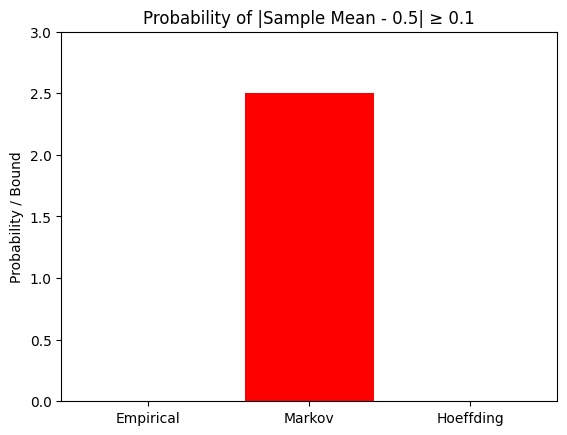

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def markov_bound(mean, alpha):
    """
    Markov's inequality for non-negative random variables.
    We apply it to |X - mean|, but typically Markov's inequality is for X >= 0.
    For demonstration, let's assume X >= 0 and we want P(X >= alpha).
    If E[X] = mean_X, then P(X >= alpha) ≤ mean_X / alpha.
    """
    # If we consider deviation X >= alpha (where X is the random variable),
    # then Markov bound says: P(X >= alpha) <= E[X] / alpha = mean / alpha.
    return mean / alpha


def hoeffding_bound(n, t, a, b):
    """
    Hoeffding's inequality bound for the probability that the sample
    mean deviates from its expectation by at least t, given variables
    in [a, b].
    """
    return 2 * np.exp(-2 * n * (t**2) / (b - a) ** 2)


# Parameters
n = 1000  # number of samples per experiment
num_experiments = 5000  # how many times to repeat
a, b = 0, 1  # Xᵢ ∈ [0, 1]
true_mean = 0.5  # E[Xᵢ] for Uniform(0, 1)
t = 0.1  # deviation threshold

# Generate many experiments
deviations = 0
for _ in range(num_experiments):
    # Sample n points from Uniform(0,1)
    samples = np.random.rand(n)
    sample_mean = np.mean(samples)

    # Check if deviation >= t
    if abs(sample_mean - true_mean) >= t:
        deviations += 1

# Empirical probability of a large deviation
empirical_prob = deviations / num_experiments

# Theoretical Markov bound
# For demonstration with Markov’s inequality, we need a non-negative r.v.
# Often we apply Markov to X = |Sₙ − E[Sₙ]| or something similar.
# The expected absolute deviation from the mean for Uniform(0,1) is 1/4.
expected_abs_dev = 1 / 4  # E[|X - 0.5|] for X ~ Uniform(0,1) is 1/4.

markov_p = markov_bound(expected_abs_dev, t)

# Hoeffding bound
hoeffding_p = hoeffding_bound(n, t, a, b)

print(f"Empirical probability of deviation ≥ {t}  : {empirical_prob:.5f}")
print(f"Markov bound estimate                     : {markov_p:.5f}")
print(f"Hoeffding bound estimate                  : {hoeffding_p:.5f}")

# Plot the bounds vs. the empirical probability
labels = ["Empirical", "Markov", "Hoeffding"]
values = [empirical_prob, markov_p, hoeffding_p]
plt.bar(labels, values, color=["blue", "red", "green"])
plt.ylabel("Probability / Bound")
plt.title(f"Probability of |Sample Mean - 0.5| ≥ {t}")
plt.ylim([0, max(values) * 1.2])
plt.show()

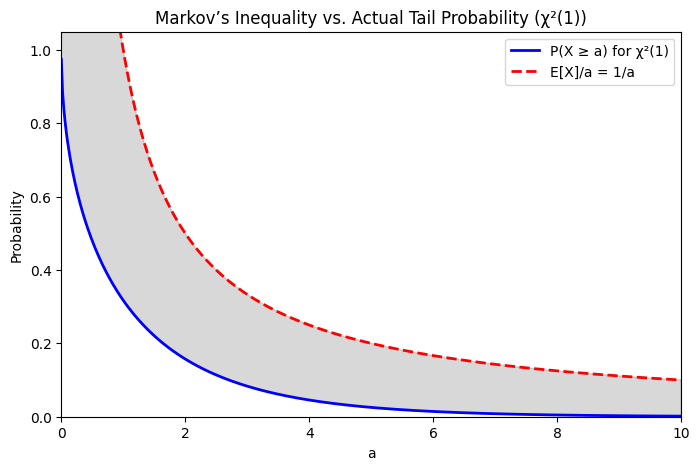

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Chi-square(1) random variable has mean E[X] = 1.
# Hence Markov's bound for P(X >= a) is simply 1 / a.

# We'll evaluate from a > 0 (to avoid division by zero) up to 10.
a_values = np.linspace(1e-3, 10, 500)

# Actual tail probability for chi-square(1): P(X >= a) = 1 - F(a)
tail_prob = 1 - chi2.cdf(a_values, df=1)

# Markov's bound: P(X >= a) ≤ E[X]/a = 1/a
markov_bound = 1 / a_values

# Plot
plt.figure(figsize=(8, 5))
plt.plot(a_values, tail_prob, "b-", lw=2, label="P(X ≥ a) for χ²(1)")
plt.plot(a_values, markov_bound, "r--", lw=2, label="E[X]/a = 1/a")

# Shade the region (the gap) between the true tail and the Markov bound
# Markov's inequality states the bound should lie above or on the tail curve.
# We'll shade wherever markov_bound >= tail_prob.
plt.fill_between(
    a_values,
    tail_prob,
    markov_bound,
    where=(markov_bound >= tail_prob),
    color="gray",
    alpha=0.3,
)

plt.xlim(0, 10)
plt.ylim(0, 1.05)
plt.title("Markov’s Inequality vs. Actual Tail Probability (χ²(1))")
plt.xlabel("a")
plt.ylabel("Probability")
plt.legend()
plt.show()

https://terrytao.wordpress.com/2010/01/03/254a-notes-1-concentration-of-measure/
